In [1]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

import pandas as pd
import numpy as np
import pickle
import time
import shap
import os
import gc

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import shap
shap.initjs()

from sm_utils import sampling, evaluate, show_results, save_model, load_model
from sm_utils import make_train_data,  make_test_data, df_to_md_table

/home/dmig/py_libs/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


ImportError: cannot import name 'show_results'

In [2]:
DATA_PATH = '/home/dmig/work/upsell/data/'
RESULT_PATH = '/home/dmig/work/upsell/result/shap_value/'

### load data

In [3]:
sample03 = pd.read_pickle(os.path.join(RESULT_PATH, 'sample03.pkl'))
sample05 = pd.read_pickle(os.path.join(RESULT_PATH, 'sample05.pkl'))
sample06 = pd.read_pickle(os.path.join(RESULT_PATH, 'sample06.pkl'))

In [4]:
sample03.shape, sample05.shape, sample06.shape

((185810, 81), (187076, 81), (188555, 80))

In [10]:
total_feature = list(sample03.columns)
feature_cols = [c for c in total_feature if c not in ['svc_mgmt_num', 'label']]

### load model

In [5]:
clf = load_model(os.path.join(RESULT_PATH, 'final_model.pkl'))

load model from  /home/dmig/work/upsell/result/shap_value//final_model.pkl


### load shap value

In [11]:
shap_values03 = np.load(os.path.join(RESULT_PATH, 'shap_values03.npy'))
shap_values05 = np.load(os.path.join(RESULT_PATH, 'shap_values05.npy'))
shap_values06 = np.load(os.path.join(RESULT_PATH, 'shap_values06.npy'))

In [12]:
shap_values03.shape, shap_values05.shape, shap_values06.shape

((185810, 79), (187076, 79), (188555, 79))

### explainer

In [8]:
explainer = shap.TreeExplainer(clf)

### plot

#### 3월

In [13]:
shap_values = shap_values03
X = sample03[feature_cols]

shap_values.shape

In [15]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

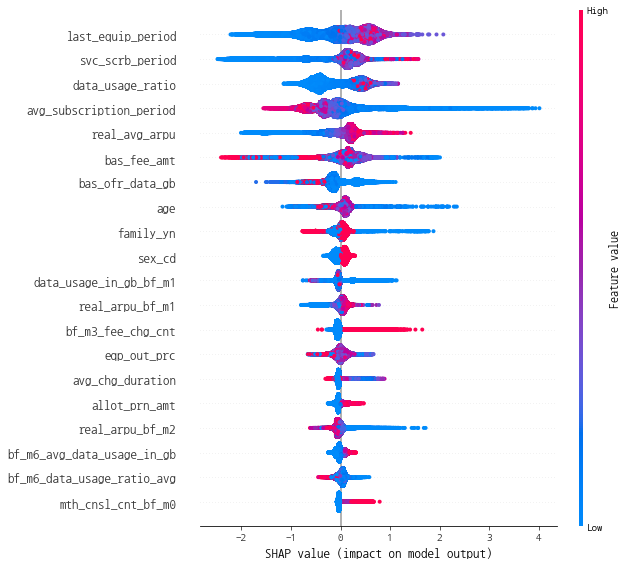

In [16]:
shap.summary_plot(shap_values, X)

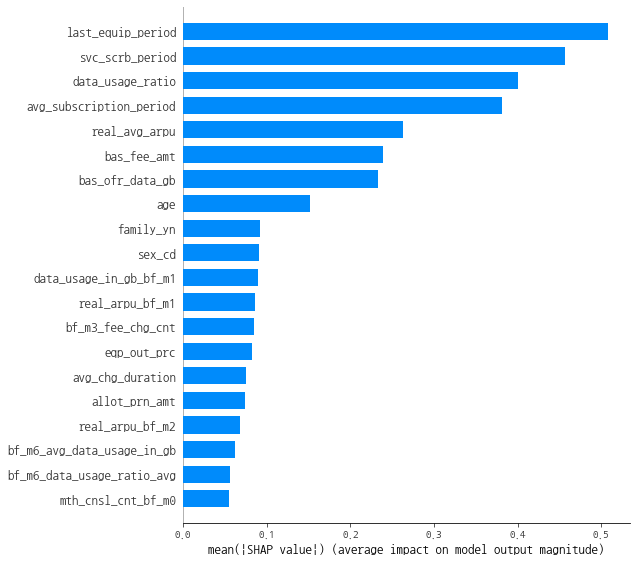

In [17]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [18]:
explainer.expected_value

-0.8870443009802246

### 5월

In [21]:
shap_values = shap_values05
X = sample05[feature_cols]

shap_values.shape

(187076, 79)

In [22]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

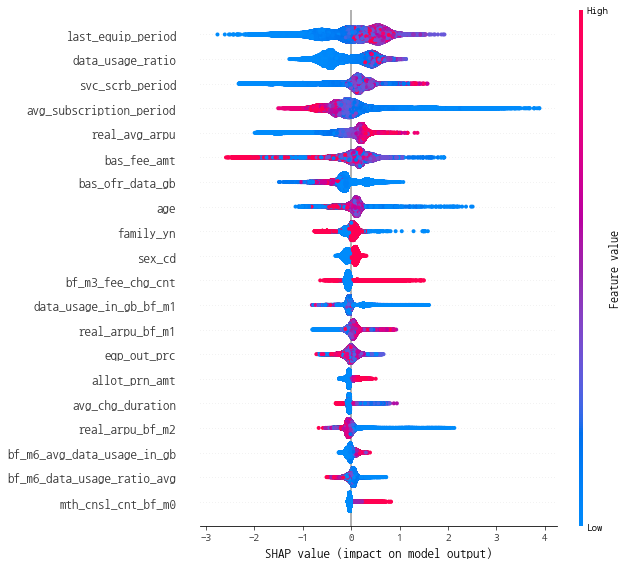

In [23]:
shap.summary_plot(shap_values, X)

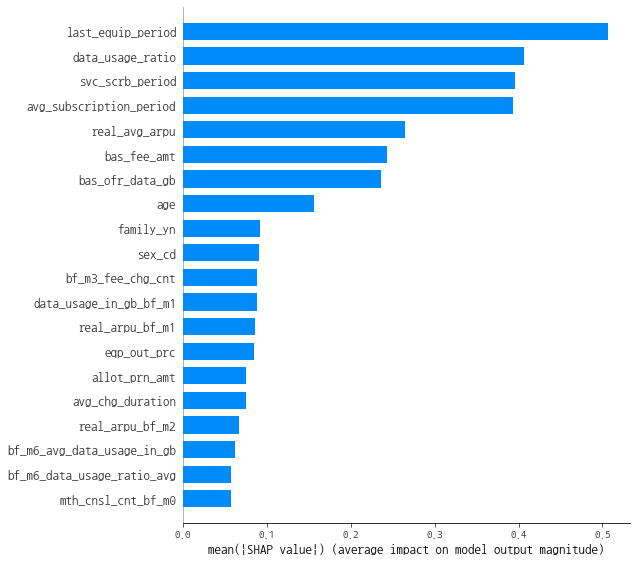

In [24]:
shap.summary_plot(shap_values, X, plot_type="bar")

### 6월

In [25]:
shap_values = shap_values06
X = sample06[feature_cols]

shap_values.shape

(188555, 79)

In [26]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

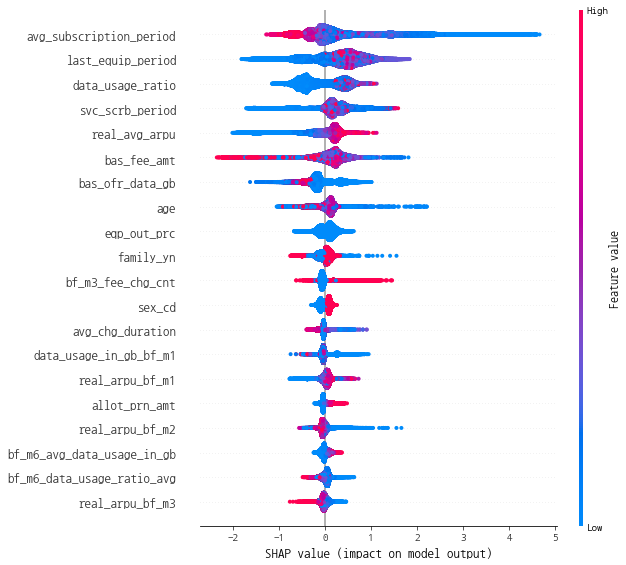

In [27]:
shap.summary_plot(shap_values, X)

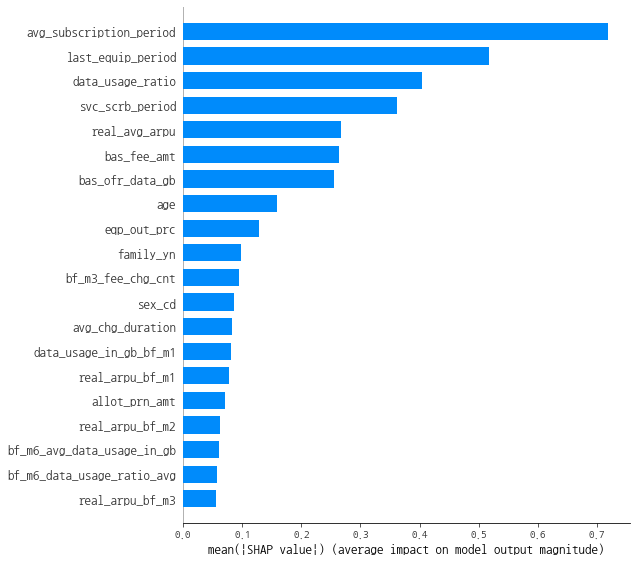

In [28]:
shap.summary_plot(shap_values, X, plot_type="bar")

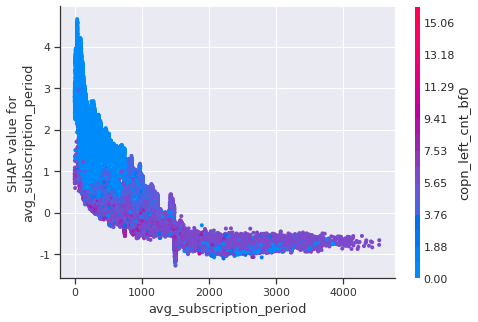

In [63]:
shap.dependence_plot(col, shap_values, X)

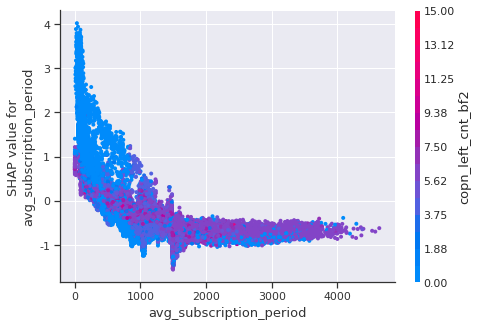

In [64]:
shap.dependence_plot(col, shap_values03, sample03[feature_cols])

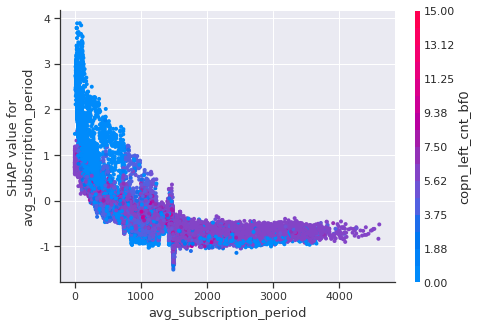

In [65]:
shap.dependence_plot(col, shap_values05, sample05[feature_cols])

In [42]:
pd.DataFrame({
    'feature': feature_cols,
    'shap_values': np.absolute(shap_values).mean(axis=0)
}).sort_values('shap_values', ascending=False).head(20)

feature  shap_values
44     avg_subscription_period     0.719584
6            last_equip_period     0.517775
53            data_usage_ratio     0.403561
5              svc_scrb_period     0.361418
49               real_avg_arpu     0.266741
7                  bas_fee_amt     0.264289
8              bas_ofr_data_gb     0.255952
1                          age     0.158909
9                  eqp_out_prc     0.128375
12                   family_yn     0.098430
50           bf_m3_fee_chg_cnt     0.094725
0                       sex_cd     0.085250
45            avg_chg_duration     0.082145
27      data_usage_in_gb_bf_m1     0.080729
46             real_arpu_bf_m1     0.078317
10               allot_prn_amt     0.070762
47             real_arpu_bf_m2     0.061453
52  bf_m6_avg_data_usage_in_gb     0.060728
54  bf_m6_data_usage_ratio_avg     0.056830
48             real_arpu_bf_m3     0.054966

In [44]:
pd.DataFrame({
    'feature': feature_cols,
    'shap_values': np.absolute(shap_values03).mean(axis=0)
}).sort_values('shap_values', ascending=False).head(20)

feature  shap_values
6            last_equip_period     0.508516
5              svc_scrb_period     0.457176
53            data_usage_ratio     0.400103
44     avg_subscription_period     0.380839
49               real_avg_arpu     0.262869
7                  bas_fee_amt     0.239320
8              bas_ofr_data_gb     0.232961
1                          age     0.151713
12                   family_yn     0.092144
0                       sex_cd     0.091124
27      data_usage_in_gb_bf_m1     0.089130
46             real_arpu_bf_m1     0.085377
50           bf_m3_fee_chg_cnt     0.084942
9                  eqp_out_prc     0.082565
45            avg_chg_duration     0.074625
10               allot_prn_amt     0.074386
47             real_arpu_bf_m2     0.068046
52  bf_m6_avg_data_usage_in_gb     0.061550
54  bf_m6_data_usage_ratio_avg     0.055752
69          mth_cnsl_cnt_bf_m0     0.055063

In [43]:
pd.DataFrame({
    'feature': feature_cols,
    'shap_values': np.absolute(shap_values05).mean(axis=0)
}).sort_values('shap_values', ascending=False).head(20)

feature  shap_values
6            last_equip_period     0.507173
53            data_usage_ratio     0.406550
5              svc_scrb_period     0.396348
44     avg_subscription_period     0.392888
49               real_avg_arpu     0.264372
7                  bas_fee_amt     0.243297
8              bas_ofr_data_gb     0.235879
1                          age     0.155654
12                   family_yn     0.092003
0                       sex_cd     0.089927
50           bf_m3_fee_chg_cnt     0.088468
27      data_usage_in_gb_bf_m1     0.088201
46             real_arpu_bf_m1     0.085914
9                  eqp_out_prc     0.084641
10               allot_prn_amt     0.075167
45            avg_chg_duration     0.074963
47             real_arpu_bf_m2     0.066380
52  bf_m6_avg_data_usage_in_gb     0.062370
54  bf_m6_data_usage_ratio_avg     0.056633
69          mth_cnsl_cnt_bf_m0     0.056607

In [54]:
def show_difference_between_three_months(m1, m2, m3, col, log_yn = False):
    
#     tmp1 = m1[[col, 'label']]
#     tmp2 = m2[[col, 'label']]
#     tmp3 = m3[[col, 'label']]
    tmp1 = m1[[col]]
    tmp2 = m2[[col]]
    tmp3 = m3[[col]]
    
    if log_yn:
        tmp1[col] = np.log1p(tmp1[col])
        tmp2[col] = np.log1p(tmp2[col])
        tmp3[col] = np.log1p(tmp3[col])
    
    sns.set(rc={'figure.figsize': (21,7)})

#     plt.subplot(1,3,1)
#     sns.distplot(m1[m1['label']==0][col], norm_hist=True, color='r', label='label: 0')
#     sns.distplot(m1[m1['label']==1][col], norm_hist=True, color='b', label='label: 1')
    sns.distplot(m1[col], norm_hist=True, color='r', label='label: 0')




#     plt.subplot(1,3,2)
#     sns.distplot(m2[m2['label']==0][col], norm_hist=True, color='r', label='label: 0')
#     sns.distplot(m2[m2['label']==1][col], norm_hist=True, color='b', label='label: 1')
    sns.distplot(m2[col], norm_hist=True, color='b', label='label: 0')

    
    
#     plt.subplot(1,3,3)
#     sns.distplot(m3[m3['label']==0][col], norm_hist=True, color='r', label='label: 0')
#     sns.distplot(m3[m3['label']==1][col], norm_hist=True, color='b', label='label: 1')
    sns.distplot(m3[col], norm_hist=True, color='g', label='label: 0')

    plt.show()

In [56]:
col = 'avg_subscription_period'

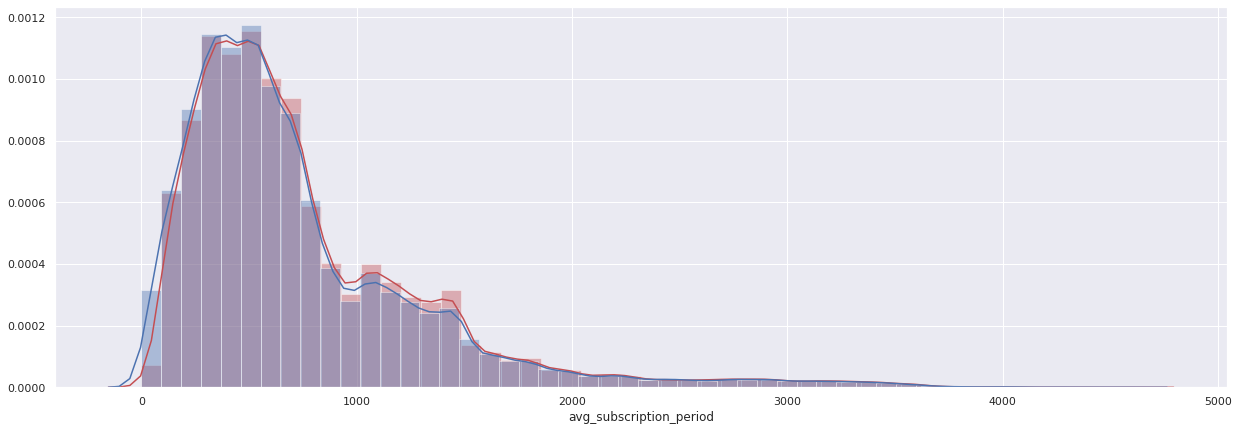

In [57]:
sns.set(rc={'figure.figsize': (21,7)})
sns.distplot(sample03[col], norm_hist=True, color='r', label='label: 0')
sns.distplot(sample05[col], norm_hist=True, color='b', label='label: 0')

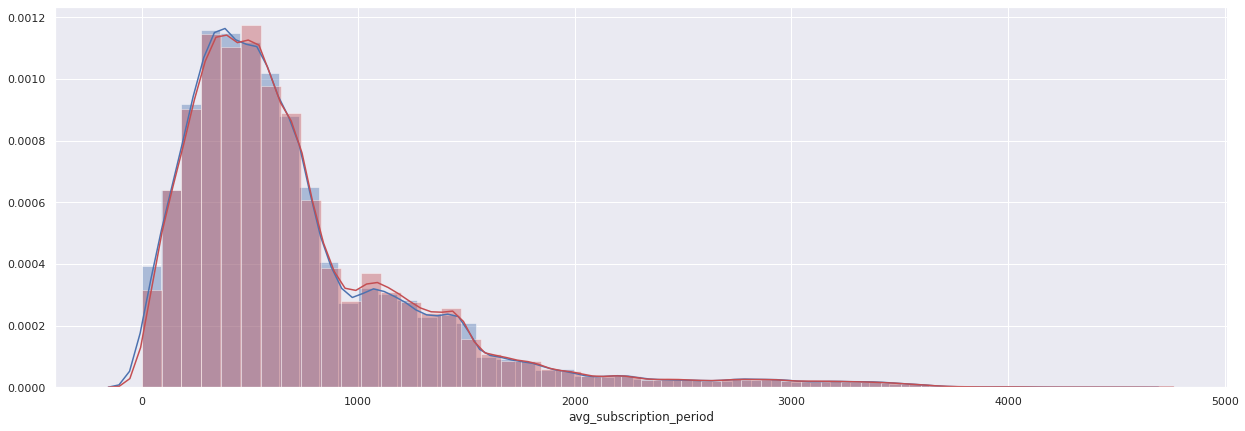

In [59]:
sns.set(rc={'figure.figsize': (21,7)})
sns.distplot(sample06[col], norm_hist=True, color='b', label='label: 0')
sns.distplot(sample05[col], norm_hist=True, color='r', label='label: 0')

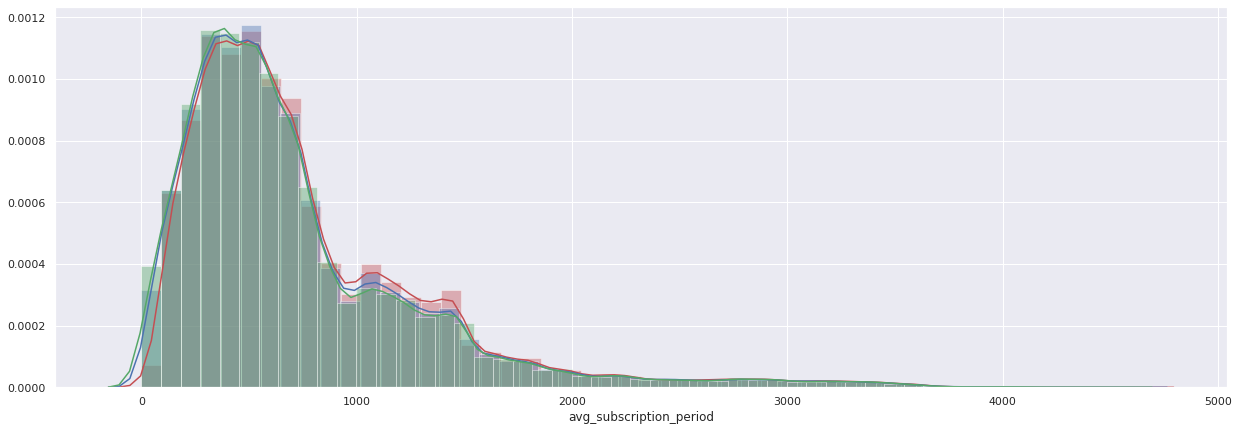

In [55]:
show_difference_between_three_months(sample03, sample05, sample06, 'avg_subscription_period')

In [52]:
sample03.avg_subscription_period.mean(), sample05.avg_subscription_period.mean(), sample06.avg_subscription_period.mean()

(759.5450186549841, 724.836635294821, 711.5798436865042)

In [53]:
sample03.avg_subscription_period.std(), sample05.avg_subscription_period.std(), sample06.avg_subscription_period.std()

(579.8978635395246, 578.8532644642481, 579.676643385663)

In [61]:
df_result = pd.read_pickle('/home/dmig/work/upsell/result/lgb_0709_102123.pkl')

In [62]:
df_result['result']

y_true    y_pred  y_pred_class
0              0  0.169322             0
1              0  0.240749             0
2              0  0.328307             0
3              0  0.263006             0
4              0  0.422791             0
5              0  0.407097             0
6              0  0.202941             0
7              0  0.436724             0
8              0  0.302185             0
9              0  0.325412             0
10             0  0.176469             0
11             0  0.309770             0
12             0  0.652770             1
13             0  0.171973             0
14             0  0.140432             0
15             0  0.075417             0
16             0  0.066673             0
17             0  0.469435             0
18             0  0.409831             0
19             0  0.514673             1
20             0  0.499081             0
21             0  0.642716             1
22             0  0.062576             0
23             0  0.116796             0
24             0  0.036348             0
25             0  0.100422             0
26             0  0.619511             1
27             0  0.258371             0
28             0  0.410430             0
29             0  0.649524             1
...          ...       ...           ...
18580954       0  0.073780             0
18580955       0  0.046417             0
18580956       0  0.025831             0
18580957       0  0.049502             0
18580958       0  0.007133             0
18580959       0  0.170201             0
18580960       0  0.028950             0
18580961       0  0.002129             0
18580962       0  0.015165             0
18580963       0  0.022788             0
18580964       0  0.010222             0
18580965       0  0.005404             0
18580966       0  0.006502             0
18580967       0  0.023328             0
18580968       0  0.011698             0
18580969       1  0.139208             0
18580970       0  0.098709             0
18580971       0  0.244065             0
18580972       0  0.016625             0
18580973       0  0.002095             0
18580974       0  0.009732             0
18580975       0  0.020632             0
18580976       0  0.008303             0
18580977       0  0.021377             0
18580978       0  0.015505             0
18580979       0  0.018901             0
18580980       0  0.005673             0
18580981       0  0.016570             0
18580982       0  0.009664             0
18580983       0  0.009240             0

[18580984 rows x 3 columns]

In [77]:
sample03[sample03.avg_subscription_period < 100].shape

(1850, 81)

In [78]:
sample05[sample05.avg_subscription_period < 100].shape

(6138, 81)

In [79]:
sample06[sample06.avg_subscription_period < 100].shape

(7506, 80)

In [ ]:
# save df -> md table format
def df_to_md_table(df, filepath):
    print('save to: ', filepath)
    df_tmp = df.copy()
    first_col = list(df_tmp.columns)[0]
    with open(filepath, 'w') as f:
        print(tabulate(df_tmp.set_index(first_col), headers='keys', tablefmt='pipe'), file=f)

### load upsell meta

In [86]:
upsell_meta = pd.read_csv('/home/dmig/work/upsell/data/upsell_meta.csv', sep='|')
upsell_meta.columns = ['t', 'feature_name', 'description', 'importance', 't2']
upsell_meta = upsell_meta[['feature_name', 'description', 'importance']]

for col in upsell_meta.columns:
    if col == 'importance':
        break
    upsell_meta[col] = upsell_meta[col].str.strip()
upsell_meta.shape

(78, 3)

In [90]:
df_shap_fi = pd.DataFrame({
    'feature_name': feature_cols,
    'shap_values': np.absolute(shap_values06).mean(axis=0)
}).sort_values('shap_values', ascending=False)

In [91]:
df_shap_fi.head()

feature_name  shap_values
44  avg_subscription_period     0.719584
6         last_equip_period     0.517775
53         data_usage_ratio     0.403561
5           svc_scrb_period     0.361418
49            real_avg_arpu     0.266741

In [92]:
df_shap_fi['importance'] = np.arange(df_shap_fi.shape[0])+1

In [93]:
df_shap_fi.reset_index(inplace=True)
df_shap_fi.drop('index', axis=1, inplace=True)
df_shap_fi.head()

feature_name  shap_values  importance
0  avg_subscription_period     0.719584           1
1        last_equip_period     0.517775           2
2         data_usage_ratio     0.403561           3
3          svc_scrb_period     0.361418           4
4            real_avg_arpu     0.266741           5

In [95]:
df_result = pd.merge(df_shap_fi[['feature_name', 'importance']], 
                     upsell_meta[['feature_name', 'description']], 
                     how='left', 
                     on='feature_name')[['feature_name', 'description', 'importance']]

In [96]:
df_result.head()

feature_name    description  importance
0  avg_subscription_period   평균 요금제 변경 주기           1
1        last_equip_period         기변 경과일           2
2         data_usage_ratio  전월 데이터 평균 소진율           3
3          svc_scrb_period      서비스 가입 기간           4
4            real_avg_arpu        평균 ARPU           5

In [97]:
df_result.loc[df_result['feature_name']=='channel', 'description']='채널'

In [99]:
df_to_md_table(df_result, 'upsell_feature_importance.txt')

save to:  upsell_feature_importance.txt
